# Choosing a location for an oil well

We need to decide where to drill a new well for the mining company GlavRosGosNeft.

We have been provided with oil samples in three regions: in each of 10,000 fields, where the quality of oil and the volume of its reserves have been measured. Build a machine learning model to help determine the region where mining will bring the most profit. Analyze possible profits and risks using the *Bootstrap* technique

Steps to choose a location:

- In the selected region, they are looking for deposits, for each, the values of the signs are determined;
- Build a model and estimate the volume of reserves;
- Select the deposits with the highest value estimates. The number of fields depends on the company's budget and the cost of developing one well;
- The profit is equal to the total profit of the selected deposits.

## Data loading and preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [2]:
data_one = pd.read_csv('geo_data_0.csv')
data_two = pd.read_csv('geo_data_1.csv')
data_three = pd.read_csv('geo_data_2.csv')

In [3]:
data_one.head(5)

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


In [4]:
def study(data):
    print(data.info())
    print(f"Shape:    {data.shape}")
    print("Na's:         ", data.isna().sum().sum())
    print("duplicates:   ", data.duplicated().sum())
    print("\nFeature distribution")
    data[["f0","f1","f2"]].hist()
    plt.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None
Shape:    (100000, 5)
Na's:          0
duplicates:    0

Feature distribution


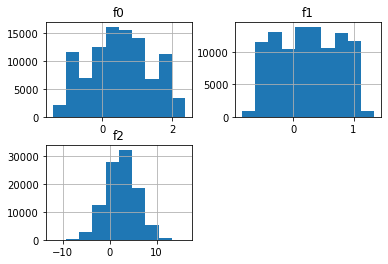

In [5]:
study(data_one)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None
Shape:    (100000, 5)
Na's:          0
duplicates:    0

Feature distribution


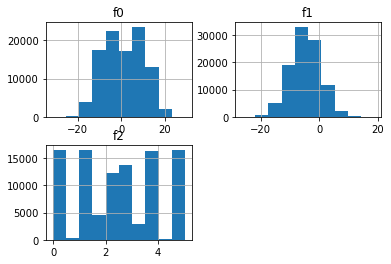

In [6]:
study(data_two)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None
Shape:    (100000, 5)
Na's:          0
duplicates:    0

Feature distribution


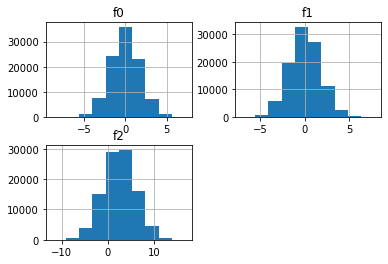

In [7]:
study(data_three)

**Resume**

- Examined the data:
    * no duplicates found, no gaps.
    * Properties for the model: f0; f1; f2.
    * Target attribute: product.
- According to the histograms, you can see that the first and third regions have a distribution of properties close to normal.
- In the second region, the f2 column data has a strange distribution.


## Train model

In [8]:
def model_train(data):
    target = data['product']
    features = data.drop(['product', 'id'] , axis=1)
    features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size=0.25, random_state=12345)

    model = LinearRegression()
    model.fit(features_train, target_train)
    predicted_valid = model.predict(features_valid)
    rmse = mean_squared_error(target_valid, predicted_valid) ** 0.5
    average_product = sum(predicted_valid) / len(predicted_valid)
    
    print('RMSE =', rmse)
    print('Average =', average_product)
    
    return rmse, predicted_valid, target_valid.reset_index(drop=True)

In [9]:
print('First region')
rmse_one, predicted_one, valid_one = model_train(data_one)

First region
RMSE = 37.5794217150813
Average = 92.59256778438008


In [10]:
print('Second region')
rmse_two, predicted_two, valid_two = model_train(data_two)

Second region
RMSE = 0.8930992867756182
Average = 68.72854689544583


In [11]:
print('Third region')
rmse_three, predicted_three, valid_three = model_train(data_three)

Third region
RMSE = 40.02970873393434
Average = 94.9650459680051


The smallest error was obtained for the model for the second region, but this may be due to initially incorrect data.
The first and third regions show an error and average oil reserves are approximately at the same level.

## Calculation of income and risks

In [12]:
budget = 10 ** 10
chosen_points = 500
best_points = 200
income_barrel = 450000

In [13]:
print('Required quantity for break-even point', np.ceil(budget / income_barrel / best_points), 'тыс баррелей')

Required quantity for break-even point 112.0 тыс баррелей


In [14]:
print('Average actual oil reserves per well in region 1', data_one['product'].mean())
print('Average actual oil reserves per well in region 2', data_two['product'].mean())
print('Average actual oil reserves per well in region 3', data_three['product'].mean())

Average actual oil reserves per well in region 1 92.50000000000001
Average actual oil reserves per well in region 2 68.82500000000002
Average actual oil reserves per well in region 3 95.00000000000004


In [15]:
def income(valid, predicted):
    sort_Series = pd.Series(predicted).sort_values(ascending=False)[:best_points]
    valid_sort = (valid.reset_index(drop = True)[sort_Series.index])
    sum_true = valid_sort.sum() 
    return round((sum_true * income_barrel) - budget,2)

In [16]:
income(valid_one, predicted_one)

3320826043.14

In [17]:
income(valid_two, predicted_two)

2415086696.68

In [18]:
income(valid_three, predicted_three)

2710349963.6

**The first region can be considered the most profitable**

In [19]:
#Use bootstrap to determine average profit, confidence interval and risk of loss
state = np.random.RandomState(12345)

def bootstrap(valid, predicted):
    revenue = []
    lost = 0
    
    for i in range(1000):
        target_subsample = valid.sample(n=500, replace=True, random_state=state)    
        probs_subsample = predicted[target_subsample.index]    
        rev = income(target_subsample, probs_subsample)
        revenue.append(rev)
        if rev < 0:
            lost += 1

    values = pd.Series(revenue)
    lower = values.quantile(0.025)
    higher = values.quantile(0.975)
    mean = values.mean()
    risk = lost / 1000

    print('Average region profit = {:.2f} руб.'.format(mean))
    print('95% confidence interval {:.2f} до {:.2f} руб.'.format(lower, higher))
    print('Percent risk {:.2%}'.format(risk))
    
    return mean, (lower, higher), risk

In [20]:
bootstrap(valid_one, predicted_one)

Average region profit = 396164984.80 руб.
95% confidence interval -111215545.89 до 909766941.55 руб.
Percent risk 6.90%


(396164984.80228, (-111215545.89, 909766941.5539998), 0.069)

In [21]:
bootstrap(valid_two, predicted_two)

Average region profit = 461155817.28 руб.
95% confidence interval 78050810.75 до 862952060.26 руб.
Percent risk 0.70%


(461155817.2772, (78050810.74800001, 862952060.26), 0.007)

In [22]:
bootstrap(valid_three, predicted_three)

Average region profit = 392950475.17 руб.
95% confidence interval -112227625.38 до 934562914.55 руб.
Percent risk 6.50%


(392950475.17066, (-112227625.37975, 934562914.5469998), 0.065)

**Resume**

+ Profit, interval and risks were calculated for three regions.

+ In the first and third regions, the risks are quite high (about 7%), but the data for the second region cannot be considered reliable enough for their use.

+ You can use the third region, since there are less risks.

## Conclusions

1. Data from three regions were examined, missing values and duplicates were processed. It was found that for the second region, the data had a strange distribution.
2. Three models were trained to predict oil volumes.
3. We calculated the profit and risks for each region.

- Although the lowest risks and high average profit were obtained for the second region, it was decided not to use it for prediction, since one cannot rely on the data provided.
- It is proposed to use the third region.